In [1]:
import h5py
import numpy as np
fh5 = h5py.File('d:/h5/fmap_cfl.h5','r')
img = fh5['map']
img = np.array(img)
print(img.shape)
lab = fh5['lab']
lab = np.array(lab)
print(lab.shape)

(11074, 33, 33)
(11074,)


In [2]:
sorted_indices = np.argsort(lab)

In [3]:
sorted_lab = lab[sorted_indices]

In [4]:
sorted_img = img[sorted_indices]

In [6]:
lll = ['BLCA', 'BRCA', 'CESC', 'COAD', 'ESCA', 'GBM', 'HNSC', 'KIRP','KICH','KIRC', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC',
      'OV', 'PAAD','PRAD','PCPG','READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC','TOTAL']

In [7]:
img3 = np.zeros((11074, 33, 33, 3))

In [8]:
import time
from tqdm import tqdm
from tqdm._tqdm import trange

C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.std.*` instead of `tqdm._tqdm.*`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for i in tqdm(range(len(lab))):
    time.sleep(0.01)
    for j in range(3):
        img3[i,:,:,j] = sorted_img[i,:,:]

100%|██████████| 11074/11074 [03:05<00:00, 59.77it/s]


In [10]:
img3.shape

(11074, 33, 33, 3)

In [11]:
img33 = np.uint8(img3)

In [12]:
img33.max()

255

In [13]:
img33.shape

(11074, 33, 33, 3)

(-0.5, 32.5, 32.5, -0.5)

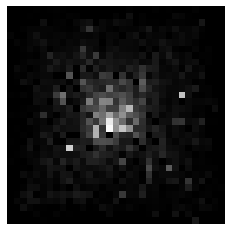

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img33[6666])
plt.axis('off')

In [17]:
img333 = img33[0]

In [18]:
img333.max()

250

(-0.5, 32.5, 32.5, -0.5)

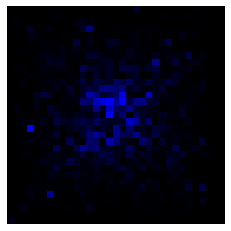

In [19]:
img333[:,:,0:2]=0 
plt.imshow(img333)
plt.axis('off')

(-0.5, 32.5, 32.5, -0.5)

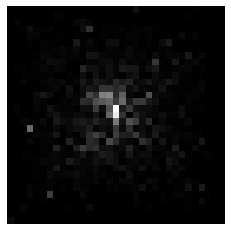

In [20]:
plt.imshow(img[0],"gray")
plt.axis('off')

In [58]:
stdall = np.mean(sorted_img,axis=0)
stdall.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

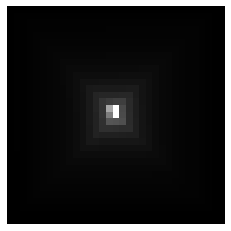

In [59]:
plt.imshow(stdall,"gray")
plt.axis('off')

In [23]:
imgcf = np.zeros((28, 33, 33, 3))
labnode = np.zeros(28)

In [24]:
m=0
for i in tqdm(range(len(lab)-1)):
    time.sleep(0.01)
    if sorted_lab[i]!=sorted_lab[i+1]:
        labnode[m+1]=i
        m=m+1

100%|██████████| 11073/11073 [03:04<00:00, 59.86it/s]


In [26]:
labnode[27]=11074
labnode

array([    0.,   435.,  1661.,  1977.,  2506.,  2707.,  2878.,  3622.,
        3715.,  4339.,  4662.,  4815.,  5353.,  5780.,  6353.,  6904.,
        7340.,  7527.,  7974.,  8167.,  8467.,  8738.,  9215.,  9659.,
        9797., 10363., 10486., 11074.])

In [27]:
lab[436]

1.0

In [28]:
b = sorted_img[0:436,:,:]
b.shape

(436, 33, 33)

In [29]:
c = img3[0:436,:,:,:]
c.shape

(436, 33, 33, 3)

In [30]:
import scipy.stats as stats

In [31]:
t_statistic, p_value = stats.ttest_ind(b, sorted_img)

C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [32]:
p_value.shape

(33, 33)

In [33]:
std = np.mean(b,axis=0)
std.max()

652.4980199541292

In [34]:
stda = np.mean(sorted_img,axis=0)
stda.max()

617.9539940807261

In [35]:
stdc = np.mean(c,axis=0)
stdc.max()

652.4980199541292

In [36]:
std.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

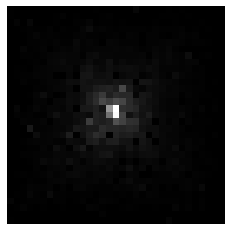

In [37]:
plt.imshow(stdc/stdc.max())
plt.axis('off')

In [38]:
for i in tqdm(range(33)):
    time.sleep(0.01)
    for j in range(33):
        if p_value[i,j]<=0.01:
            if std[i,j]>stda[i,j]:
                stdc[i,j,0:2]=0
            if std[i,j]<stda[i,j]:
                stdc[i,j,1:3]=0

100%|██████████| 33/33 [00:00<00:00, 58.45it/s]


In [39]:
stdc = np.uint8(stdc)

In [41]:
for i in tqdm(range(27)):
    x = labnode[i]
    y = labnode[i+1]+1
    img_1 = sorted_img[int(x)+1:int(y),:,:]
    img_2 = img3[int(x)+1:int(y),:,:,:]
    #print(img1.shape)
    std = np.mean(img_1,axis=0)
    stdc = np.mean(img_2,axis=0)
    t_statistic, p_value = stats.ttest_ind(img_1, sorted_img)
    for ii in range(33):
        for jj in range(33):
            if p_value[ii,jj]<=0.01:
                if std[ii,jj]>stda[ii,jj]:
                    stdc[ii,jj,0:2]=0
                if std[ii,jj]<stda[ii,jj]:
                    stdc[ii,jj,1:3]=0
    imgcf[i] =  stdc
    
    #print(std.shape)

100%|██████████| 27/27 [00:01<00:00, 15.37it/s]


In [42]:
imgcf8 = np.uint8(imgcf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 32.5, 32.5, -0.5)

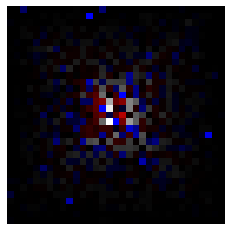

In [43]:
plt.imshow(imgcf8[7]/imgcf8[0].max())
plt.axis('off')

In [94]:
import h5py 
f = h5py.File(r'd:/h5/fmapksh_cfl.h5', 'w')
f.create_dataset('map', data=imgcf8)
f.close()

In [44]:
imgcf8[26].max()

181

In [45]:
imgcfg = np.zeros((28, 33, 33, 3))

In [46]:
imgcfg = imgcf8

(-0.5, 32.5, 32.5, -0.5)

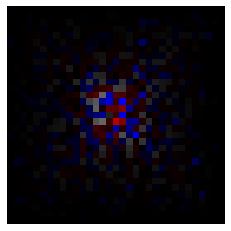

In [47]:
plt.imshow(imgcfg[17])
plt.axis('off')

In [50]:
imgcfg[27]=0

In [62]:
for j in range(3):
    imgcfg[27,:,:,j] = stdall/stdall.max()*255

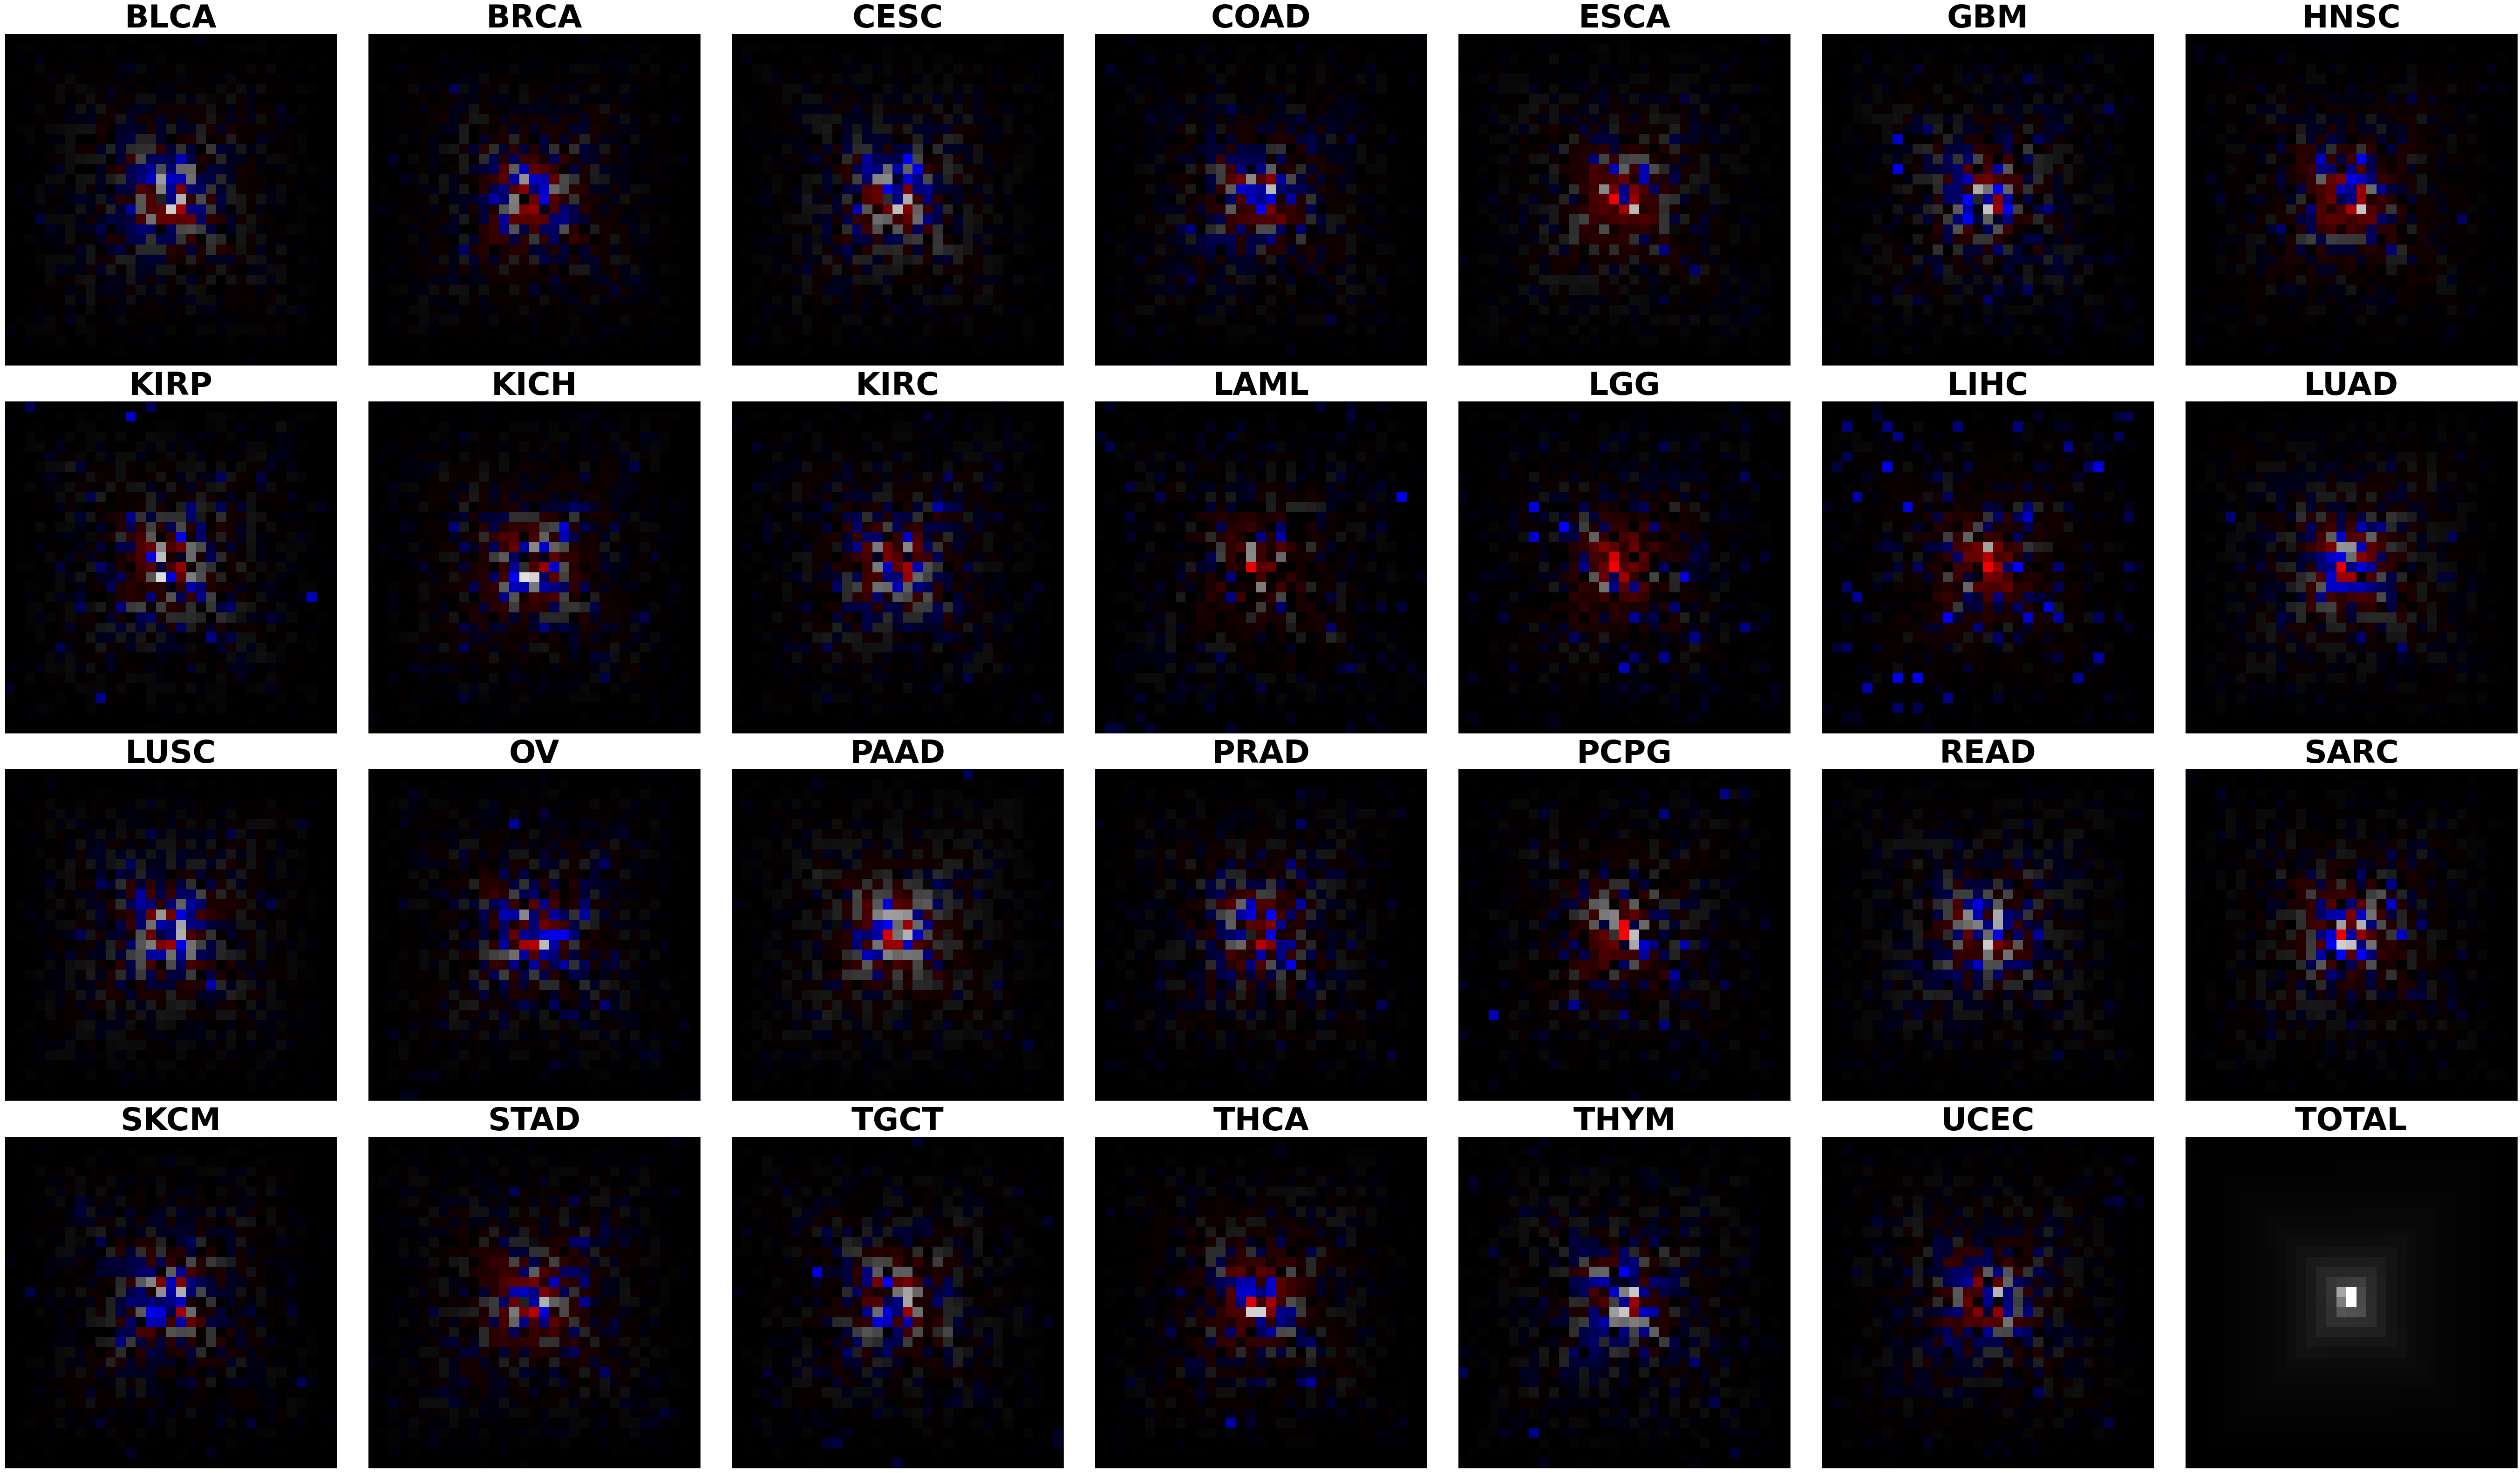

In [63]:
fig = plt.figure(figsize=(76, 44))
for i in range(28):
    ax = fig.add_subplot(4, 7, i+1, xticks=[], yticks=[])
    ax.imshow(imgcf8[i])
    ax.set_title(lll[i],pad = 14, fontdict={'weight':'bold','size':68})
        
plt.tight_layout()
plt.show()

In [65]:
imgcfall = np.zeros((11074, 33, 33, 3))

In [66]:
for i in tqdm(range(11074)):

    img_1 = sorted_img[i]
    img_2 = img3[i]
    #print(img1.shape)
    #std = np.mean(img_1,axis=0)
    #stdc = np.mean(img_2,axis=0)
    t_statistic, p_value = stats.ttest_ind(img_1, sorted_img)
    for ii in range(33):
        for jj in range(33):
            if p_value[ii,jj]<=0.01:
                if img_1[ii,jj]>stda[ii,jj]:
                    img_2[ii,jj,0:2]=0
                if img_1[ii,jj]<stda[ii,jj]:
                    img_2[ii,jj,1:3]=0
    imgcfall[i] =  img_2

100%|██████████| 11074/11074 [11:37<00:00, 15.88it/s]


In [67]:
imgcfall8 = np.uint8(imgcfall)

In [68]:
imgcfall[8].max()

740.84431

(-0.5, 32.5, 32.5, -0.5)

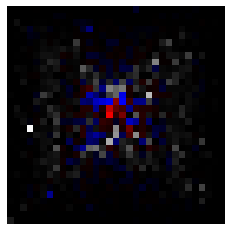

In [69]:
plt.imshow(imgcfall8[0])
plt.axis('off')

In [178]:
f = h5py.File(r'd:/h5/fmapkshall_cfl.h5', 'w')
f.create_dataset('map', data=imgcfall)
f.create_dataset('mapu', data=imgcfall8)
f.create_dataset('lab', data=lab)
f.close()